In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

2021-09-22 17:28:15.843464: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
import time
start_time = time.time()

In [3]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-a5145eea-9cd2-58eb-034b-638825cfe4ca)


In [4]:
!nvidia-smi

Wed Sep 22 17:28:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
IMAGE_SIZE = 256
BATCH_SIZE=16
# EPOCHS=50
EPOCHS=50

In [6]:
 !pwd

/kaggle/working


In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"/kaggle/input/plant-village/PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 20638 files belonging to 15 classes.


2021-09-22 17:28:36.755794: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-22 17:28:36.758955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-22 17:28:36.801356: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-22 17:28:36.801996: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-22 17:28:36.802055: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-22 17:28:36.839874: I tensorflow/stream_executor/platform/def

In [8]:
class_names = dataset.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [9]:
len(dataset)

1290

In [10]:
645*32

20640

In [11]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())


2021-09-22 17:28:39.068086: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-22 17:28:39.071989: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000189999 Hz


(16, 256, 256, 3)
[14  5  1  9  5  0  3 10  6  5  1  0 12 10  3  5]


In [12]:
# plt.figure(figsize=(10,10))
# for image_batch, label_batch in dataset.take(1):
#     for i in range(12):
#         ax = plt.subplot(3,4,i+1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[label_batch[i]])
#         plt.axis("off")

In [13]:
train_size = 0.8
len(dataset)*train_size

1032.0

In [14]:
train_ds = dataset.take(516)
len(train_ds)

516

In [15]:
test_ds = dataset.skip(516)
len(test_ds)

774

In [16]:
validation_ds = test_ds.take(65)
len(validation_ds)

65

In [17]:
test_ds = test_ds.skip(65)
len(test_ds)

709

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size) 
    val_size = int(val_split * ds_size)
        
    train_ds = ds.take(train_size)
        
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds              

In [18]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size) 
    val_size = int(val_split * ds_size)
        
    train_ds = ds.take(516)
        
    val_ds = ds.skip(516).take(65)
    test_ds = ds.skip(581).take(64)
    
    return train_ds,val_ds,test_ds

In [19]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

516

In [21]:
len(val_ds)

65

In [22]:
len(test_ds)

64

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [26]:
CHANNELS = 3
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 15

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (16, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (16, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (16, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (16, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (16, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (16, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (16, 60, 60, 64)         

In [28]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
hostory =  model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds
)

Epoch 1/50


2021-09-22 17:28:42.649339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-09-22 17:28:43.527365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-09-22 17:28:52.691986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 97 of 1000
2021-09-22 17:29:02.629501: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 207 of 1000
2021-09-22 17:29:12.682998: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 318 of 1000
2021-09-22 17:29:22.697244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 427 of 1000
2021-09-22 17:29:30.755842: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.
2021-0

514/516 [============================>.] - ETA: 0s - loss: 2.4506 - accuracy: 0.1933

2021-09-22 17:29:59.191926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 1 of 1000
2021-09-22 17:30:05.376318: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


516/516 [==============================] - 84s 57ms/step - loss: 2.4499 - accuracy: 0.1935 - val_loss: 2.2647 - val_accuracy: 0.2481
Epoch 2/50
516/516 [==============================] - 10s 20ms/step - loss: 2.0458 - accuracy: 0.3101 - val_loss: 1.7632 - val_accuracy: 0.4442
Epoch 3/50
516/516 [==============================] - 10s 20ms/step - loss: 1.6136 - accuracy: 0.4807 - val_loss: 1.1958 - val_accuracy: 0.5981
Epoch 4/50
516/516 [==============================] - 10s 20ms/step - loss: 1.2064 - accuracy: 0.5937 - val_loss: 1.1072 - val_accuracy: 0.6365
Epoch 5/50
516/516 [==============================] - 10s 20ms/step - loss: 0.9402 - accuracy: 0.6842 - val_loss: 0.9458 - val_accuracy: 0.7038
Epoch 6/50
516/516 [==============================] - 10s 20ms/step - loss: 0.7004 - accuracy: 0.7487 - val_loss: 0.8439 - val_accuracy: 0.6942
Epoch 7/50
516/516 [==============================] - 10s 20ms/step - loss: 0.6371 - accuracy: 0.7783 - val_loss: 0.5479 - val_accuracy: 0.8000
Epo

In [30]:
model.evaluate(test_ds)

2021-09-22 17:38:55.230558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 1 of 1000
2021-09-22 17:39:01.269172: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:177] Filling up shuffle buffer (this may take a while): 56 of 1000


19/64 [=======>......................] - ETA: 0s - loss: 0.1017 - accuracy: 0.9605

2021-09-22 17:39:02.227232: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:230] Shuffle buffer filled.


64/64 [==============================] - 22s 9ms/step - loss: 0.2363 - accuracy: 0.9229


[0.23633022606372833, 0.9228515625]

In [31]:
hostory.params

{'verbose': 1, 'epochs': 50, 'steps': 516}

In [32]:
hostory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
from statistics import mean
mean(hostory.history['accuracy'])

0.8686506754159927

In [34]:
loss = hostory.history['loss']
acc = hostory.history['accuracy']

val_loss = hostory.history['val_loss']
val_acc = hostory.history['val_accuracy']

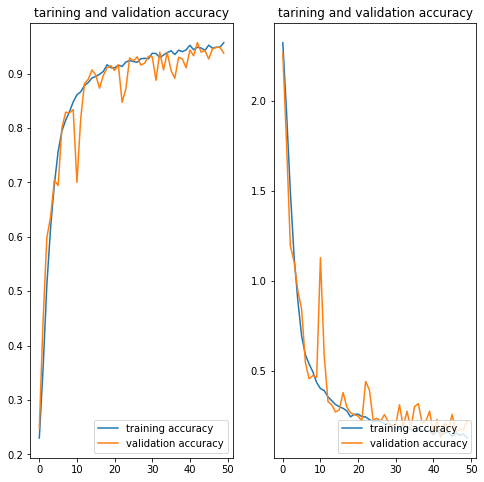

In [35]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='training accuracy')
plt.plot(range(EPOCHS), val_acc, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('tarining and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='training accuracy')
plt.plot(range(EPOCHS), val_loss, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('tarining and validation accuracy')
plt.show()

In [36]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 671.6291079521179 seconds ---
